In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [5]:
# Display first few rows and basic info
print("Dataset preview:")
print(data.head())
print("\nDataset info:")
print(data.info())

Dataset preview:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  

Dataset info:
<class 'pandas.core.frame

In [6]:
# Step 1: Data Preprocessing
# Handle missing values if any
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [7]:
# Removing unnecessary columns if present (modify if needed)
# data = data.drop(['ID'], axis=1)  # Example: Drop 'ID' column if it exists

In [8]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

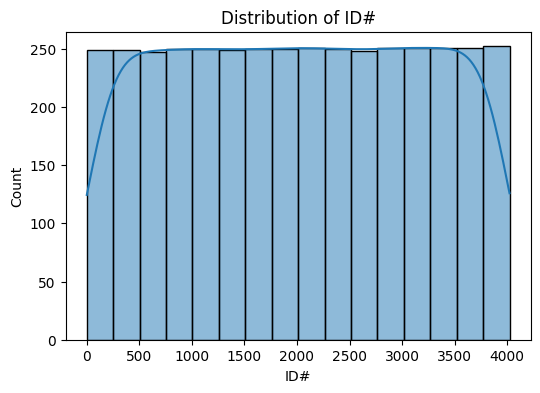

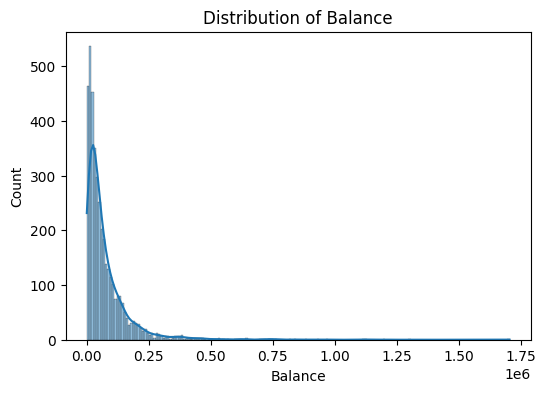

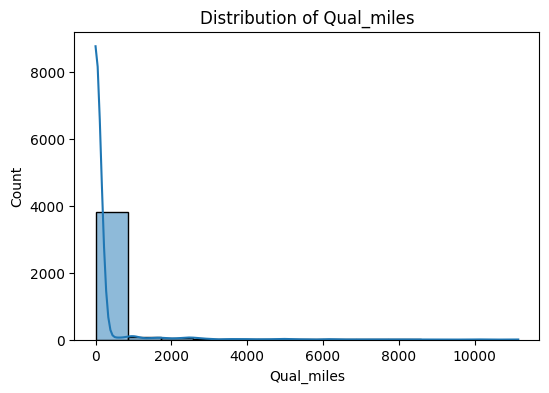

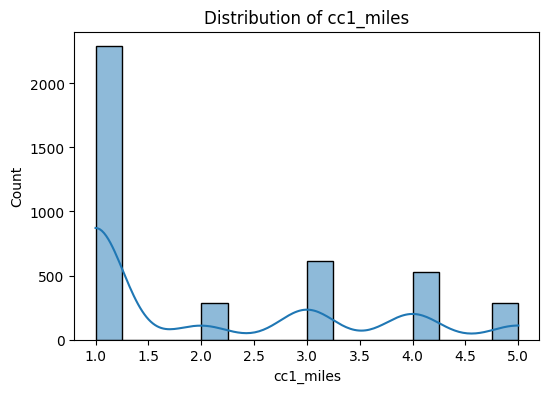

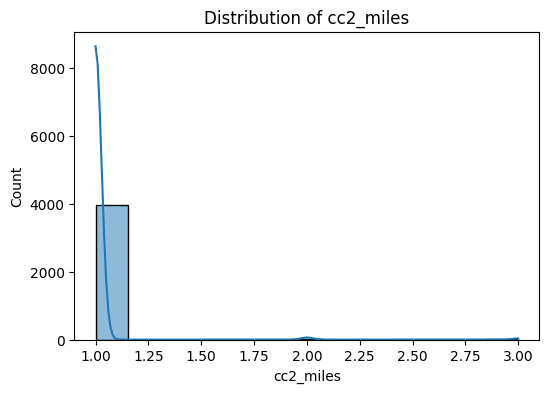

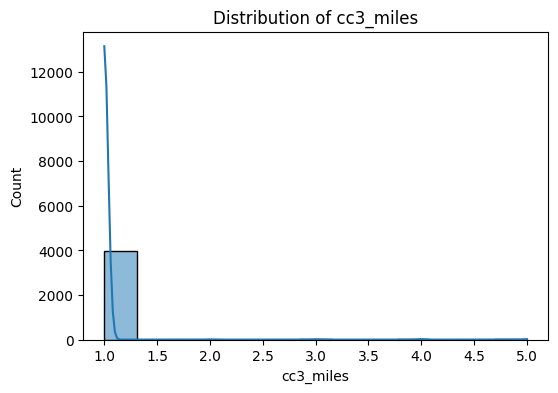

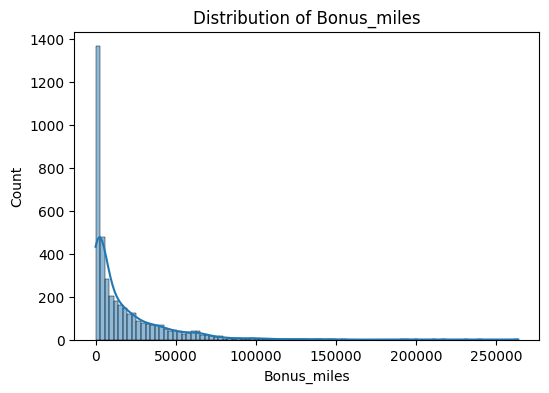

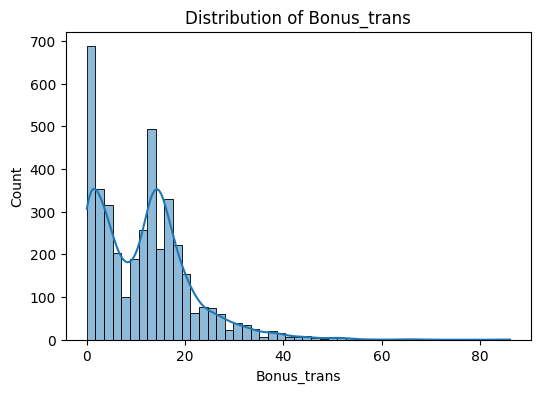

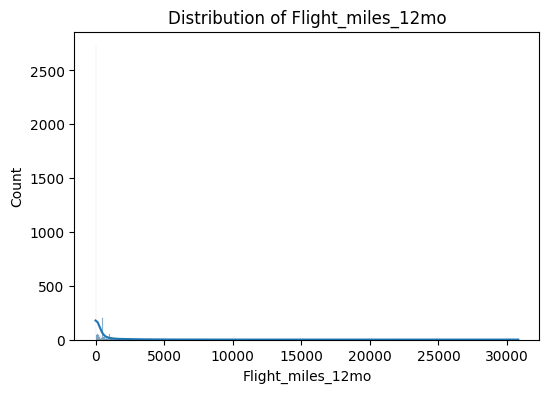

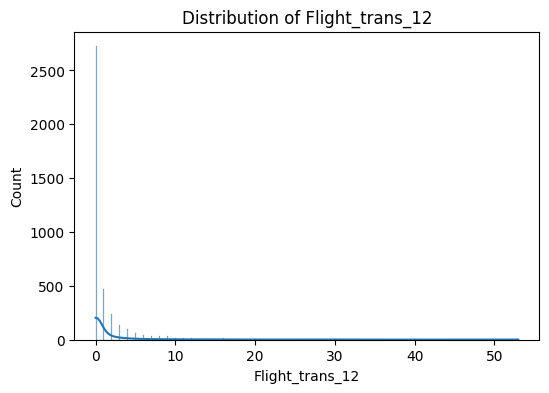

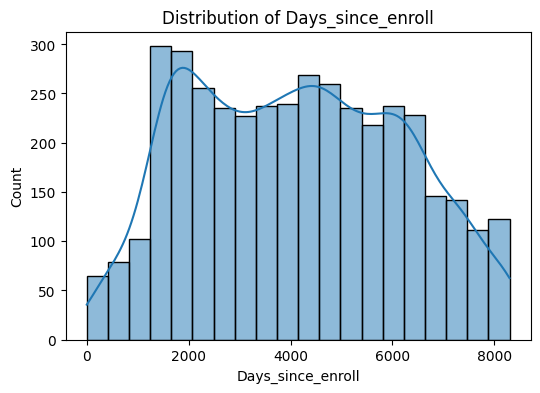

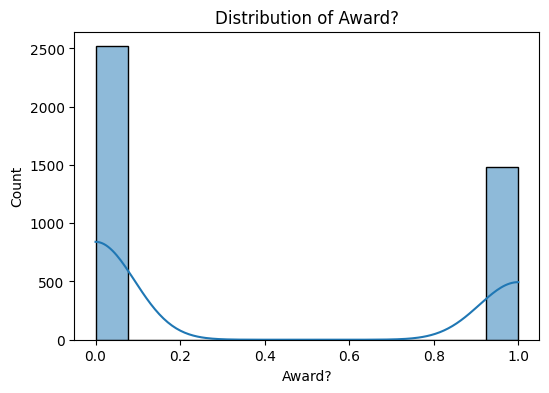

In [9]:
# Step 2: Exploratory Data Analysis (EDA)
# Plotting the distribution of each feature
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

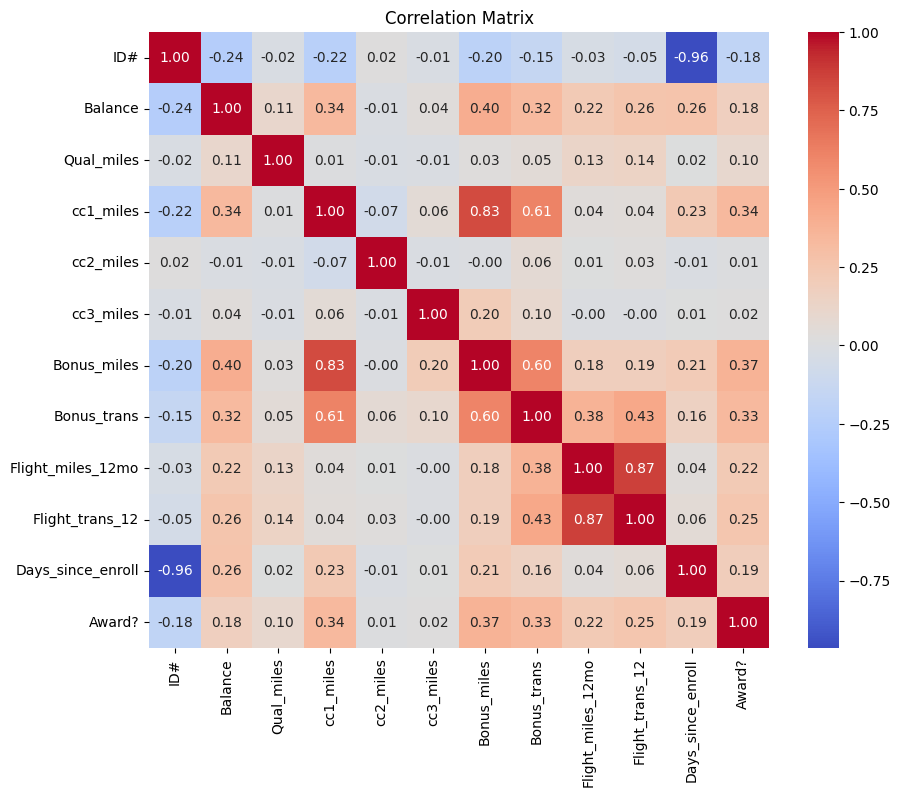

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Step 3: K-Means Clustering
# Elbow Method for K selection
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(sum(np.min(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])

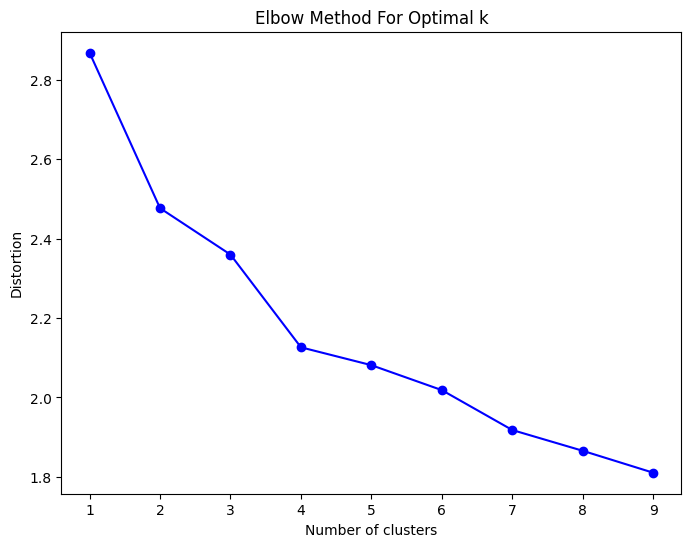

In [12]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# Applying K-Means with optimal K
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust 'n_clusters' as needed
kmeans_labels = kmeans.fit_predict(scaled_data)

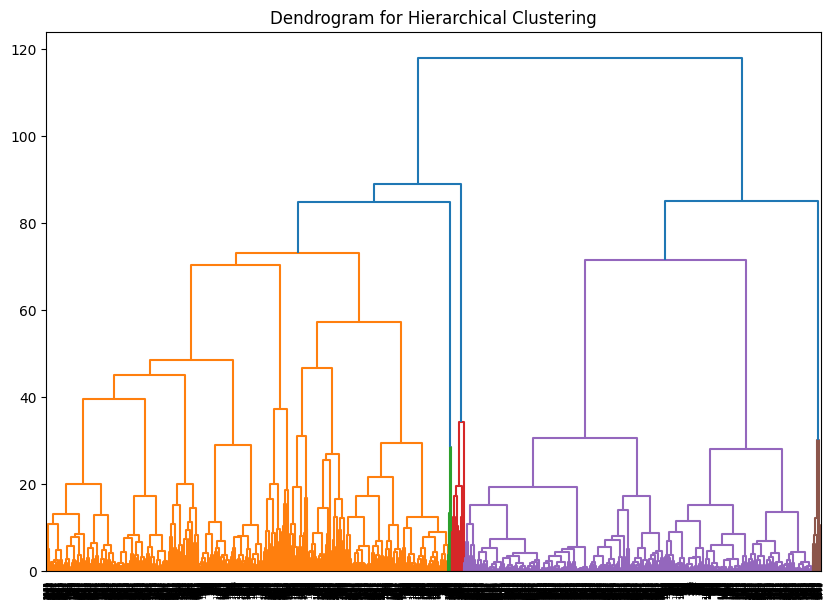

In [15]:
# Step 4: Hierarchical Clustering
# Dendrogram to choose number of clusters
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [16]:
# Applying hierarchical clustering with a chosen number of clusters
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')  # Adjust 't' as needed

In [17]:
# Step 5: DBSCAN Clustering
# Applying DBSCAN with chosen parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' as needed
dbscan_labels = dbscan.fit_predict(scaled_data)

In [18]:
# Step 6: Cluster Analysis and Interpretation
# K-Means cluster analysis
print("\nK-Means Cluster Analysis:")
data['KMeans_Cluster'] = kmeans_labels
print(data.groupby('KMeans_Cluster').mean())


K-Means Cluster Analysis:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1753.128049  189304.225610  788.689024   2.182927   1.036585   
1               2324.241897   42286.342688   92.323715   1.246245   1.019368   
2               1447.829885  119771.163985  163.517241   3.620690   1.002299   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000  31780.481707    27.115854        5420.414634   
1                1.000000   4903.299209     7.000395         195.184585   
2                1.037548  39038.232950    18.573180         350.190038   

                Flight_trans_12  Days_since_enroll    Award?  
KMeans_Cluster                                                
0                     15.841463        4657.036585  0.810976  
1      

In [23]:
# Hierarchical cluster analysis
print("\nHierarchical Cluster Analysis:")
data['Hierarchical_Cluster'] = hierarchical_labels
print(data.groupby('Hierarchical_Cluster').mean())


Hierarchical Cluster Analysis:
                              ID#        Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                      
1                     2386.144872   38935.969072    9.754205   1.182854   
2                     1752.952381  160067.206349  573.587302   2.507937   
3                     1695.729575  101523.403727  249.498806   2.817965   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
1                       1.03147   1.000000   4025.555073     6.501899   
2                       1.00000   1.000000  42723.841270    34.142857   
3                       1.00000   1.023411  27927.157191    15.414238   

                      Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Hierarchical_Cluster                                                          
1                            124.668475         0.426479        3442

In [24]:
# DBSCAN cluster analysis
print("\nDBSCAN Cluster Analysis:")
data['DBSCAN_Cluster'] = dbscan_labels
print(data['DBSCAN_Cluster'].value_counts())


DBSCAN Cluster Analysis:
DBSCAN_Cluster
-1     1683
 0     1402
 6      218
 1      215
 10     123
 12      90
 16      56
 2       41
 19      35
 7       31
 20      18
 14      14
 3       11
 13       9
 5        7
 8        7
 18       5
 21       5
 22       5
 15       5
 17       5
 9        5
 4        5
 11       4
Name: count, dtype: int64


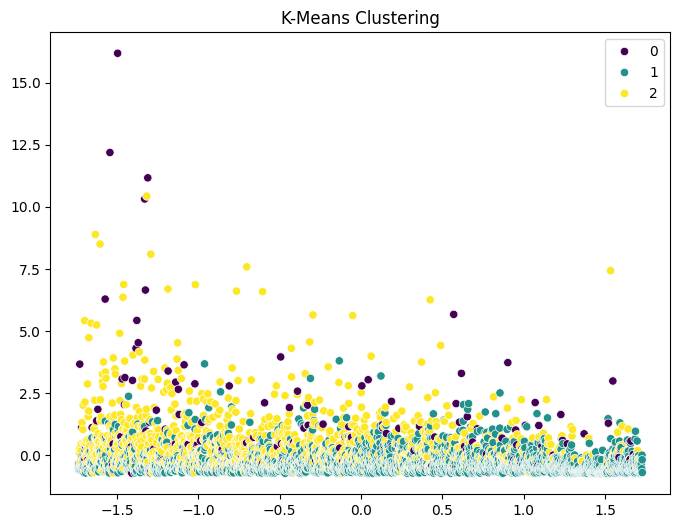

In [25]:
# Step 7: Visualization of Clusters (Example with KMeans)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering")
plt.show()

In [26]:
# Step 8: Evaluation - Silhouette Score for KMeans and DBSCAN
print("\nSilhouette Score for K-Means:", silhouette_score(scaled_data, kmeans_labels))
print("Silhouette Score for DBSCAN:", silhouette_score(scaled_data, dbscan_labels))


Silhouette Score for K-Means: 0.2812008913802934
Silhouette Score for DBSCAN: -0.2823258834687895
